In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import time

In [2]:
#生成模拟数据， 假设真实函数为 y = x^3 + 2 * x^2 - 3 * x + 4
data_total_num = 200
x_data = np.sort( np.random.uniform(low=-1, high=1, size=data_total_num) )

In [3]:
#创建函数 计算y值
def func(x):
    return pow(x,3) + 2*pow(x,2) - 3*x + 4
y_data_func = func(x_data)

In [4]:
#加入噪声， 让y值在一个小的区域内波动
y_data = y_data_func + np.random.normal(scale=0.5, size=len(y_data_func))

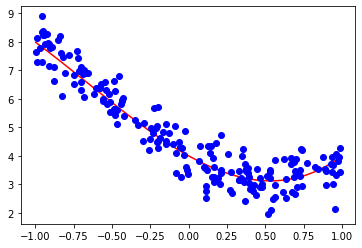

In [5]:
#绘制数据
plt.plot(x_data, y_data_func, color='r')
plt.plot(x_data, y_data, 'ob')

In [6]:
#将曲线上方和下方的数据进行分类
print( np.where(y_data > y_data_func) )

(array([  2,   5,   6,   7,   8,   9,  10,  11,  12,  14,  15,  16,  19,
        20,  21,  23,  25,  28,  29,  30,  31,  34,  35,  36,  38,  39,
        41,  42,  43,  44,  47,  48,  50,  53,  57,  60,  61,  62,  63,
        64,  66,  69,  72,  73,  74,  75,  77,  79,  81,  82,  83,  85,
        86,  87,  88,  91,  92,  94,  96, 100, 101, 108, 109, 110, 112,
       114, 117, 121, 122, 123, 125, 129, 131, 132, 136, 137, 138, 139,
       140, 142, 147, 148, 152, 154, 155, 156, 160, 163, 165, 166, 167,
       169, 170, 172, 173, 175, 176, 177, 178, 180, 181, 182, 183, 184,
       190, 195, 197, 198], dtype=int64),)


In [7]:
y_label = np.zeros(shape=[data_total_num,])
y_label[np.where(y_data > y_data_func)] = 1
print(y_label)

[0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0.]


In [8]:
up_index = np.where(y_data > y_data_func)
down_index = np.where(y_data < y_data_func)

x_up = x_data[up_index]
y_up = y_data[up_index]

x_down = x_data[down_index]
y_down = y_data[down_index]

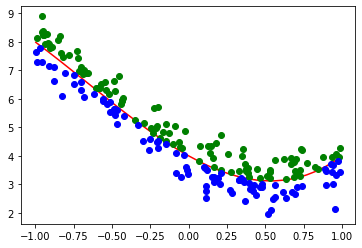

In [9]:
plt.plot(x_data, y_data_func, color='r')
plt.plot(x_up, y_up, 'ob', color='g')
plt.plot(x_down, y_down, 'ob', color='b')

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation='selu', input_shape=(2,), name='my_dense'))
model.add(keras.layers.Dense(8, activation='softplus'))
model.add(keras.layers.Dense(2, activation='softmax'))  
    
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["sparse_categorical_accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_dense (Dense)             (None, 8)                 24        
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


In [12]:
indexs = np.random.choice(data_total_num, data_total_num, replace=False)
x_input_1 = x_data[indexs] #x_data
x_input_2 = y_data[indexs] #y_data

x_input = np.hstack((x_input_1.reshape(-1,1), x_input_2.reshape(-1,1)))
y_input = y_label[indexs]

In [13]:
history = model.fit(x_input, y_input, validation_split=0.1, epochs=1000)

Train on 180 samples, validate on 20 samples
Epoch 1/1000
180/180 [==============================] - 1s 6ms/sample - loss: 0.8211 - sparse_categorical_accuracy: 0.5333 - val_loss: 0.7889 - val_sparse_categorical_accuracy: 0.6000
Epoch 2/1000
180/180 [==============================] - 0s 211us/sample - loss: 0.7930 - sparse_categorical_accuracy: 0.5056 - val_loss: 0.7784 - val_sparse_categorical_accuracy: 0.6000
Epoch 3/1000
180/180 [==============================] - 0s 253us/sample - loss: 0.7756 - sparse_categorical_accuracy: 0.5167 - val_loss: 0.7711 - val_sparse_categorical_accuracy: 0.5000
Epoch 4/1000
180/180 [==============================] - 0s 253us/sample - loss: 0.7630 - sparse_categorical_accuracy: 0.4722 - val_loss: 0.7555 - val_sparse_categorical_accuracy: 0.5500
Epoch 5/1000
180/180 [==============================] - 0s 183us/sample - loss: 0.7548 - sparse_categorical_accuracy: 0.4944 - val_loss: 0.7439 - val_sparse_categorical_accuracy: 0.6000
Epoch 6/1000
180/180 [=====

Epoch 45/1000
180/180 [==============================] - 0s 219us/sample - loss: 0.6634 - sparse_categorical_accuracy: 0.5889 - val_loss: 0.5987 - val_sparse_categorical_accuracy: 0.7000
Epoch 46/1000
180/180 [==============================] - 0s 178us/sample - loss: 0.6635 - sparse_categorical_accuracy: 0.6167 - val_loss: 0.5965 - val_sparse_categorical_accuracy: 0.7000
Epoch 47/1000
180/180 [==============================] - 0s 222us/sample - loss: 0.6633 - sparse_categorical_accuracy: 0.6056 - val_loss: 0.5992 - val_sparse_categorical_accuracy: 0.7000
Epoch 48/1000
180/180 [==============================] - 0s 189us/sample - loss: 0.6620 - sparse_categorical_accuracy: 0.5944 - val_loss: 0.5982 - val_sparse_categorical_accuracy: 0.7000
Epoch 49/1000
180/180 [==============================] - 0s 211us/sample - loss: 0.6627 - sparse_categorical_accuracy: 0.5833 - val_loss: 0.5916 - val_sparse_categorical_accuracy: 0.7000
Epoch 50/1000
180/180 [==============================] - 0s 211us

Epoch 89/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.6479 - sparse_categorical_accuracy: 0.6444 - val_loss: 0.5765 - val_sparse_categorical_accuracy: 0.7500
Epoch 90/1000
180/180 [==============================] - 0s 178us/sample - loss: 0.6468 - sparse_categorical_accuracy: 0.6500 - val_loss: 0.5817 - val_sparse_categorical_accuracy: 0.8000
Epoch 91/1000
180/180 [==============================] - 0s 203us/sample - loss: 0.6511 - sparse_categorical_accuracy: 0.5944 - val_loss: 0.5671 - val_sparse_categorical_accuracy: 0.6500
Epoch 92/1000
180/180 [==============================] - 0s 169us/sample - loss: 0.6459 - sparse_categorical_accuracy: 0.6778 - val_loss: 0.5825 - val_sparse_categorical_accuracy: 0.8000
Epoch 93/1000
180/180 [==============================] - 0s 178us/sample - loss: 0.6436 - sparse_categorical_accuracy: 0.6222 - val_loss: 0.5789 - val_sparse_categorical_accuracy: 0.8000
Epoch 94/1000
180/180 [==============================] - 0s 175us

Epoch 133/1000
180/180 [==============================] - 0s 169us/sample - loss: 0.6281 - sparse_categorical_accuracy: 0.6778 - val_loss: 0.5656 - val_sparse_categorical_accuracy: 0.6500
Epoch 134/1000
180/180 [==============================] - 0s 164us/sample - loss: 0.6320 - sparse_categorical_accuracy: 0.6667 - val_loss: 0.5659 - val_sparse_categorical_accuracy: 0.6500
Epoch 135/1000
180/180 [==============================] - 0s 166us/sample - loss: 0.6266 - sparse_categorical_accuracy: 0.6889 - val_loss: 0.5635 - val_sparse_categorical_accuracy: 0.7000
Epoch 136/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.6264 - sparse_categorical_accuracy: 0.6833 - val_loss: 0.5781 - val_sparse_categorical_accuracy: 0.7500
Epoch 137/1000
180/180 [==============================] - 0s 191us/sample - loss: 0.6281 - sparse_categorical_accuracy: 0.6611 - val_loss: 0.5692 - val_sparse_categorical_accuracy: 0.7500
Epoch 138/1000
180/180 [==============================] - 0s

180/180 [==============================] - 0s 211us/sample - loss: 0.6052 - sparse_categorical_accuracy: 0.6833 - val_loss: 0.5504 - val_sparse_categorical_accuracy: 0.8000
Epoch 177/1000
180/180 [==============================] - 0s 169us/sample - loss: 0.6071 - sparse_categorical_accuracy: 0.7000 - val_loss: 0.5531 - val_sparse_categorical_accuracy: 0.7500
Epoch 178/1000
180/180 [==============================] - 0s 175us/sample - loss: 0.6068 - sparse_categorical_accuracy: 0.7056 - val_loss: 0.5711 - val_sparse_categorical_accuracy: 0.7500
Epoch 179/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.6113 - sparse_categorical_accuracy: 0.6833 - val_loss: 0.5623 - val_sparse_categorical_accuracy: 0.8000
Epoch 180/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.6053 - sparse_categorical_accuracy: 0.6833 - val_loss: 0.5608 - val_sparse_categorical_accuracy: 0.8000
Epoch 181/1000
180/180 [==============================] - 0s 166us/sample -

Epoch 220/1000
180/180 [==============================] - 0s 214us/sample - loss: 0.5836 - sparse_categorical_accuracy: 0.7056 - val_loss: 0.5519 - val_sparse_categorical_accuracy: 0.9000
Epoch 221/1000
180/180 [==============================] - 0s 211us/sample - loss: 0.5834 - sparse_categorical_accuracy: 0.7111 - val_loss: 0.5548 - val_sparse_categorical_accuracy: 0.8500
Epoch 222/1000
180/180 [==============================] - 0s 183us/sample - loss: 0.5838 - sparse_categorical_accuracy: 0.7111 - val_loss: 0.5599 - val_sparse_categorical_accuracy: 0.8000
Epoch 223/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.5929 - sparse_categorical_accuracy: 0.7056 - val_loss: 0.5682 - val_sparse_categorical_accuracy: 0.7500
Epoch 224/1000
180/180 [==============================] - 0s 178us/sample - loss: 0.5871 - sparse_categorical_accuracy: 0.7222 - val_loss: 0.5362 - val_sparse_categorical_accuracy: 0.8000
Epoch 225/1000
180/180 [==============================] - 0s

180/180 [==============================] - 0s 186us/sample - loss: 0.5673 - sparse_categorical_accuracy: 0.7222 - val_loss: 0.5469 - val_sparse_categorical_accuracy: 0.8500
Epoch 264/1000
180/180 [==============================] - 0s 169us/sample - loss: 0.5644 - sparse_categorical_accuracy: 0.7222 - val_loss: 0.5490 - val_sparse_categorical_accuracy: 0.8000
Epoch 265/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.5693 - sparse_categorical_accuracy: 0.7167 - val_loss: 0.5880 - val_sparse_categorical_accuracy: 0.7000
Epoch 266/1000
180/180 [==============================] - 0s 175us/sample - loss: 0.5645 - sparse_categorical_accuracy: 0.7222 - val_loss: 0.5781 - val_sparse_categorical_accuracy: 0.7000
Epoch 267/1000
180/180 [==============================] - 0s 197us/sample - loss: 0.5681 - sparse_categorical_accuracy: 0.7278 - val_loss: 0.5439 - val_sparse_categorical_accuracy: 0.9000
Epoch 268/1000
180/180 [==============================] - 0s 166us/sample -

Epoch 307/1000
180/180 [==============================] - 0s 175us/sample - loss: 0.5485 - sparse_categorical_accuracy: 0.7167 - val_loss: 0.5347 - val_sparse_categorical_accuracy: 0.9000
Epoch 308/1000
180/180 [==============================] - 0s 161us/sample - loss: 0.5527 - sparse_categorical_accuracy: 0.7333 - val_loss: 0.5705 - val_sparse_categorical_accuracy: 0.7000
Epoch 309/1000
180/180 [==============================] - 0s 166us/sample - loss: 0.5415 - sparse_categorical_accuracy: 0.7333 - val_loss: 0.5457 - val_sparse_categorical_accuracy: 0.8000
Epoch 310/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.5460 - sparse_categorical_accuracy: 0.7222 - val_loss: 0.5379 - val_sparse_categorical_accuracy: 0.9000
Epoch 311/1000
180/180 [==============================] - 0s 191us/sample - loss: 0.5400 - sparse_categorical_accuracy: 0.7389 - val_loss: 0.5216 - val_sparse_categorical_accuracy: 0.9000
Epoch 312/1000
180/180 [==============================] - 0s

180/180 [==============================] - 0s 200us/sample - loss: 0.5290 - sparse_categorical_accuracy: 0.7444 - val_loss: 0.5148 - val_sparse_categorical_accuracy: 0.9000
Epoch 351/1000
180/180 [==============================] - 0s 194us/sample - loss: 0.5258 - sparse_categorical_accuracy: 0.7556 - val_loss: 0.5399 - val_sparse_categorical_accuracy: 0.8500
Epoch 352/1000
180/180 [==============================] - 0s 183us/sample - loss: 0.5247 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.5288 - val_sparse_categorical_accuracy: 0.9000
Epoch 353/1000
180/180 [==============================] - 0s 180us/sample - loss: 0.5563 - sparse_categorical_accuracy: 0.7333 - val_loss: 0.5413 - val_sparse_categorical_accuracy: 0.7500
Epoch 354/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.5212 - sparse_categorical_accuracy: 0.7333 - val_loss: 0.5132 - val_sparse_categorical_accuracy: 0.9000
Epoch 355/1000
180/180 [==============================] - 0s 175us/sample -

Epoch 394/1000
180/180 [==============================] - 0s 178us/sample - loss: 0.5010 - sparse_categorical_accuracy: 0.7778 - val_loss: 0.5030 - val_sparse_categorical_accuracy: 0.8000
Epoch 395/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.5081 - sparse_categorical_accuracy: 0.7722 - val_loss: 0.5164 - val_sparse_categorical_accuracy: 0.9000
Epoch 396/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.5118 - sparse_categorical_accuracy: 0.7556 - val_loss: 0.5059 - val_sparse_categorical_accuracy: 0.9000
Epoch 397/1000
180/180 [==============================] - 0s 169us/sample - loss: 0.5054 - sparse_categorical_accuracy: 0.7722 - val_loss: 0.5327 - val_sparse_categorical_accuracy: 0.9000
Epoch 398/1000
180/180 [==============================] - 0s 178us/sample - loss: 0.5187 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.5174 - val_sparse_categorical_accuracy: 0.9000
Epoch 399/1000
180/180 [==============================] - 0s

180/180 [==============================] - 0s 172us/sample - loss: 0.4796 - sparse_categorical_accuracy: 0.8056 - val_loss: 0.5083 - val_sparse_categorical_accuracy: 0.9000
Epoch 438/1000
180/180 [==============================] - 0s 186us/sample - loss: 0.5047 - sparse_categorical_accuracy: 0.7500 - val_loss: 0.5066 - val_sparse_categorical_accuracy: 0.9000
Epoch 439/1000
180/180 [==============================] - 0s 180us/sample - loss: 0.4806 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.4867 - val_sparse_categorical_accuracy: 0.9000
Epoch 440/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.4850 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.5252 - val_sparse_categorical_accuracy: 0.8000
Epoch 441/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.4803 - sparse_categorical_accuracy: 0.8278 - val_loss: 0.5167 - val_sparse_categorical_accuracy: 0.8500
Epoch 442/1000
180/180 [==============================] - 0s 166us/sample -

Epoch 481/1000
180/180 [==============================] - 0s 191us/sample - loss: 0.4521 - sparse_categorical_accuracy: 0.7944 - val_loss: 0.5110 - val_sparse_categorical_accuracy: 0.9000
Epoch 482/1000
180/180 [==============================] - 0s 211us/sample - loss: 0.4497 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.4730 - val_sparse_categorical_accuracy: 0.8500
Epoch 483/1000
180/180 [==============================] - 0s 169us/sample - loss: 0.4567 - sparse_categorical_accuracy: 0.7889 - val_loss: 0.5307 - val_sparse_categorical_accuracy: 0.9000
Epoch 484/1000
180/180 [==============================] - 0s 208us/sample - loss: 0.4543 - sparse_categorical_accuracy: 0.7944 - val_loss: 0.4927 - val_sparse_categorical_accuracy: 0.9000
Epoch 485/1000
180/180 [==============================] - 0s 200us/sample - loss: 0.4637 - sparse_categorical_accuracy: 0.7889 - val_loss: 0.4658 - val_sparse_categorical_accuracy: 0.8500
Epoch 486/1000
180/180 [==============================] - 0s

180/180 [==============================] - 0s 200us/sample - loss: 0.4821 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.4599 - val_sparse_categorical_accuracy: 0.9000
Epoch 525/1000
180/180 [==============================] - 0s 180us/sample - loss: 0.4536 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.5033 - val_sparse_categorical_accuracy: 0.9000
Epoch 526/1000
180/180 [==============================] - 0s 189us/sample - loss: 0.4285 - sparse_categorical_accuracy: 0.8611 - val_loss: 0.4645 - val_sparse_categorical_accuracy: 0.9000
Epoch 527/1000
180/180 [==============================] - 0s 194us/sample - loss: 0.4576 - sparse_categorical_accuracy: 0.7722 - val_loss: 0.4542 - val_sparse_categorical_accuracy: 0.8000
Epoch 528/1000
180/180 [==============================] - 0s 175us/sample - loss: 0.4617 - sparse_categorical_accuracy: 0.7778 - val_loss: 0.5112 - val_sparse_categorical_accuracy: 0.7500
Epoch 529/1000
180/180 [==============================] - 0s 178us/sample -

Epoch 568/1000
180/180 [==============================] - 0s 247us/sample - loss: 0.3998 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.4635 - val_sparse_categorical_accuracy: 0.9000
Epoch 569/1000
180/180 [==============================] - 0s 230us/sample - loss: 0.4716 - sparse_categorical_accuracy: 0.7556 - val_loss: 0.4251 - val_sparse_categorical_accuracy: 0.8500
Epoch 570/1000
180/180 [==============================] - 0s 266us/sample - loss: 0.4184 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.4380 - val_sparse_categorical_accuracy: 0.8000
Epoch 571/1000
180/180 [==============================] - 0s 208us/sample - loss: 0.4555 - sparse_categorical_accuracy: 0.7778 - val_loss: 0.4251 - val_sparse_categorical_accuracy: 0.8500
Epoch 572/1000
180/180 [==============================] - 0s 191us/sample - loss: 0.4212 - sparse_categorical_accuracy: 0.7889 - val_loss: 0.4494 - val_sparse_categorical_accuracy: 0.9000
Epoch 573/1000
180/180 [==============================] - 0s

180/180 [==============================] - 0s 208us/sample - loss: 0.3789 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.5230 - val_sparse_categorical_accuracy: 0.8500
Epoch 612/1000
180/180 [==============================] - 0s 191us/sample - loss: 0.4067 - sparse_categorical_accuracy: 0.7944 - val_loss: 0.4474 - val_sparse_categorical_accuracy: 0.9000
Epoch 613/1000
180/180 [==============================] - 0s 203us/sample - loss: 0.4086 - sparse_categorical_accuracy: 0.8111 - val_loss: 0.5418 - val_sparse_categorical_accuracy: 0.6500
Epoch 614/1000
180/180 [==============================] - 0s 200us/sample - loss: 0.4252 - sparse_categorical_accuracy: 0.7944 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.9000
Epoch 615/1000
180/180 [==============================] - 0s 191us/sample - loss: 0.4093 - sparse_categorical_accuracy: 0.8222 - val_loss: 0.4059 - val_sparse_categorical_accuracy: 0.8000
Epoch 616/1000
180/180 [==============================] - 0s 208us/sample -

180/180 [==============================] - 0s 186us/sample - loss: 0.3724 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.4257 - val_sparse_categorical_accuracy: 0.9000
Epoch 655/1000
180/180 [==============================] - 0s 191us/sample - loss: 0.3739 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.4052 - val_sparse_categorical_accuracy: 0.9000
Epoch 656/1000
180/180 [==============================] - 0s 194us/sample - loss: 0.3657 - sparse_categorical_accuracy: 0.8389 - val_loss: 0.4975 - val_sparse_categorical_accuracy: 0.8500
Epoch 657/1000
180/180 [==============================] - 0s 194us/sample - loss: 0.4108 - sparse_categorical_accuracy: 0.7778 - val_loss: 0.4457 - val_sparse_categorical_accuracy: 0.7500
Epoch 658/1000
180/180 [==============================] - 0s 216us/sample - loss: 0.4390 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.4607 - val_sparse_categorical_accuracy: 0.9000
Epoch 659/1000
180/180 [==============================] - 0s 200us/sample -

Epoch 698/1000
180/180 [==============================] - 0s 216us/sample - loss: 0.4270 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.4550 - val_sparse_categorical_accuracy: 0.7500
Epoch 699/1000
180/180 [==============================] - 0s 183us/sample - loss: 0.4024 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.3836 - val_sparse_categorical_accuracy: 0.8500
Epoch 700/1000
180/180 [==============================] - 0s 189us/sample - loss: 0.3542 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.4069 - val_sparse_categorical_accuracy: 0.9000
Epoch 701/1000
180/180 [==============================] - 0s 211us/sample - loss: 0.4301 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.4019 - val_sparse_categorical_accuracy: 0.7500
Epoch 702/1000
180/180 [==============================] - 0s 189us/sample - loss: 0.3840 - sparse_categorical_accuracy: 0.8389 - val_loss: 0.6351 - val_sparse_categorical_accuracy: 0.6500
Epoch 703/1000
180/180 [==============================] - 0s

180/180 [==============================] - 0s 183us/sample - loss: 0.3574 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.8919 - val_sparse_categorical_accuracy: 0.5500
Epoch 742/1000
180/180 [==============================] - 0s 211us/sample - loss: 0.4840 - sparse_categorical_accuracy: 0.7556 - val_loss: 0.4153 - val_sparse_categorical_accuracy: 0.7500
Epoch 743/1000
180/180 [==============================] - 0s 191us/sample - loss: 0.4229 - sparse_categorical_accuracy: 0.7778 - val_loss: 0.3625 - val_sparse_categorical_accuracy: 0.9000
Epoch 744/1000
180/180 [==============================] - 0s 180us/sample - loss: 0.3613 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.5923 - val_sparse_categorical_accuracy: 0.7000
Epoch 745/1000
180/180 [==============================] - 0s 211us/sample - loss: 0.4839 - sparse_categorical_accuracy: 0.7556 - val_loss: 0.3489 - val_sparse_categorical_accuracy: 0.9000
Epoch 746/1000
180/180 [==============================] - 0s 194us/sample -

Epoch 785/1000
180/180 [==============================] - 0s 286us/sample - loss: 0.4090 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.3848 - val_sparse_categorical_accuracy: 0.7500
Epoch 786/1000
180/180 [==============================] - 0s 228us/sample - loss: 0.3929 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.3650 - val_sparse_categorical_accuracy: 0.9000
Epoch 787/1000
180/180 [==============================] - 0s 189us/sample - loss: 0.5584 - sparse_categorical_accuracy: 0.7278 - val_loss: 0.3513 - val_sparse_categorical_accuracy: 0.8000
Epoch 788/1000
180/180 [==============================] - 0s 183us/sample - loss: 0.4479 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.3389 - val_sparse_categorical_accuracy: 0.9000
Epoch 789/1000
180/180 [==============================] - 0s 194us/sample - loss: 0.3807 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.3714 - val_sparse_categorical_accuracy: 0.7500
Epoch 790/1000
180/180 [==============================] - 0s

180/180 [==============================] - 0s 186us/sample - loss: 0.3660 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.3922 - val_sparse_categorical_accuracy: 0.9500
Epoch 829/1000
180/180 [==============================] - 0s 186us/sample - loss: 0.3075 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.3252 - val_sparse_categorical_accuracy: 0.9000
Epoch 830/1000
180/180 [==============================] - 0s 183us/sample - loss: 0.3014 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.3481 - val_sparse_categorical_accuracy: 0.8500
Epoch 831/1000
180/180 [==============================] - 0s 180us/sample - loss: 0.3181 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.3398 - val_sparse_categorical_accuracy: 0.8500
Epoch 832/1000
180/180 [==============================] - 0s 180us/sample - loss: 0.3241 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.3908 - val_sparse_categorical_accuracy: 0.7500
Epoch 833/1000
180/180 [==============================] - 0s 211us/sample -

Epoch 872/1000
180/180 [==============================] - 0s 175us/sample - loss: 0.2905 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.3432 - val_sparse_categorical_accuracy: 0.9000
Epoch 873/1000
180/180 [==============================] - 0s 180us/sample - loss: 0.3096 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.4020 - val_sparse_categorical_accuracy: 0.7500
Epoch 874/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.6010 - sparse_categorical_accuracy: 0.7000 - val_loss: 0.3646 - val_sparse_categorical_accuracy: 0.8000
Epoch 875/1000
180/180 [==============================] - 0s 194us/sample - loss: 0.3665 - sparse_categorical_accuracy: 0.7944 - val_loss: 0.3166 - val_sparse_categorical_accuracy: 0.9500
Epoch 876/1000
180/180 [==============================] - 0s 175us/sample - loss: 0.2757 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.3762 - val_sparse_categorical_accuracy: 0.7500
Epoch 877/1000
180/180 [==============================] - 0s

180/180 [==============================] - 0s 178us/sample - loss: 0.2980 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.4499 - val_sparse_categorical_accuracy: 0.7500
Epoch 916/1000
180/180 [==============================] - 0s 178us/sample - loss: 0.3282 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.3929 - val_sparse_categorical_accuracy: 0.8500
Epoch 917/1000
180/180 [==============================] - 0s 172us/sample - loss: 0.3728 - sparse_categorical_accuracy: 0.8111 - val_loss: 0.3704 - val_sparse_categorical_accuracy: 0.7500
Epoch 918/1000
180/180 [==============================] - 0s 186us/sample - loss: 0.2884 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.3495 - val_sparse_categorical_accuracy: 0.7500
Epoch 919/1000
180/180 [==============================] - 0s 178us/sample - loss: 0.2745 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.3926 - val_sparse_categorical_accuracy: 0.8500
Epoch 920/1000
180/180 [==============================] - 0s 194us/sample -

Epoch 959/1000
180/180 [==============================] - 0s 186us/sample - loss: 0.3471 - sparse_categorical_accuracy: 0.8389 - val_loss: 0.2870 - val_sparse_categorical_accuracy: 0.9000
Epoch 960/1000
180/180 [==============================] - 0s 183us/sample - loss: 0.3191 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.3219 - val_sparse_categorical_accuracy: 0.8000
Epoch 961/1000
180/180 [==============================] - 0s 175us/sample - loss: 0.3211 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.4462 - val_sparse_categorical_accuracy: 0.7500
Epoch 962/1000
180/180 [==============================] - 0s 186us/sample - loss: 0.3729 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.2987 - val_sparse_categorical_accuracy: 0.9000
Epoch 963/1000
180/180 [==============================] - 0s 175us/sample - loss: 0.2733 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.2768 - val_sparse_categorical_accuracy: 0.9500
Epoch 964/1000
180/180 [==============================] - 0s

In [14]:
#绘制训练结果
y_pred = model.predict(x_input)
y_label_pred = np.zeros(shape=[data_total_num,])
for index in range(y_pred.shape[0]):
    if(y_pred[index][0] < 0.5):
        y_label_pred[index] = 1
#print(y_label_pred)

In [15]:
up_index = np.where(y_label_pred > 0.5)
down_index = np.where(y_label_pred < 0.5)

x_up = x_input_1[up_index]
y_up = x_input_2[up_index]

x_down = x_input_1[down_index]
y_down = x_input_2[down_index]

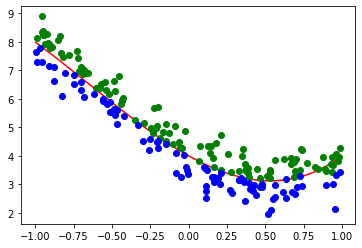

In [16]:
plt.plot(x_data, y_data_func, color='r')
plt.plot(x_up, y_up, 'ob', color='g')
plt.plot(x_down, y_down, 'ob', color='b')